In [1]:
from abenc_ph_mj18 import PH_ABE, mat_math, Inner_Product
from charm.toolbox.pairinggroup import PairingGroup, ZR, G1, G2, GT, pair
from charm.toolbox.ABEnc import ABEnc
from nizk import NIZK
from benchmark import Benchmark
from collections import defaultdict 
import time
import matplotlib.pyplot as plt
import numpy as np

## Benchmarking

In [2]:
ben = Benchmark(PairingGroup('MNT224'))
datasets = defaultdict(str)

In [3]:
xs = range(5,101,5)
datasets = ben.benchmark_scheme(2, xs, datasets)
datasets = ben.benchmark_scheme(3, xs, datasets)

---------------- 5 -----------------------
Each AA's cost:  0.11192016601562499
Each AA's extra cost:  0.3424389362335205
Adv's extra cost:  0.01855015754699707
Total cost:  0.7164530754089355
Total NIZK cost:  0.4644622802734375
---------------- 10 -----------------------
Each AA's cost:  0.15377910137176515
Each AA's extra cost:  0.6524889469146729
Adv's extra cost:  0.018678903579711914
Total cost:  1.7523858547210693
Total NIZK cost:  0.9276082515716553
---------------- 15 -----------------------
Each AA's cost:  0.19818620681762697
Each AA's extra cost:  0.9562234878540039
Adv's extra cost:  0.018808841705322266
Total cost:  3.2619681358337402
Total NIZK cost:  1.379575252532959
---------------- 20 -----------------------
Each AA's cost:  0.24246550798416136
Each AA's extra cost:  1.258800983428955
Adv's extra cost:  0.01835179328918457
Total cost:  5.183197259902954
Total NIZK cost:  1.8329041004180908
---------------- 25 -----------------------
Each AA's cost:  0.286490135192871

In [4]:
sp_xs = range(5,102,8)
datasets = ben.benchmark_scheme(5, sp_xs, datasets)
datasets = ben.benchmark_scheme(10, sp_xs, datasets)

---------------- 5 -----------------------
Each AA's cost:  0.21327295303344726
Each AA's extra cost:  0.7268190383911133
Adv's extra cost:  0.03675222396850586
Total cost:  1.4883508682250977
Total NIZK cost:  0.9554877281188965
---------------- 13 -----------------------
Each AA's cost:  0.27966836782602167
Each AA's extra cost:  1.7900705337524414
Adv's extra cost:  0.038031816482543945
Total cost:  4.524755239486694
Total NIZK cost:  2.4997596740722656
---------------- 21 -----------------------
Each AA's cost:  0.34968998318626765
Each AA's extra cost:  2.8682806491851807
Adv's extra cost:  0.03838777542114258
Total cost:  8.65603232383728
Total NIZK cost:  4.007378578186035
---------------- 29 -----------------------
Each AA's cost:  0.4216532460574446
Each AA's extra cost:  3.910993814468384
Adv's extra cost:  0.039397239685058594
Total cost:  13.967782258987427
Total NIZK cost:  5.50885796546936
---------------- 37 -----------------------
Each AA's cost:  0.49400655643360036
Ea

In [17]:
import pickle
with open('data.pkl','wb') as file:
    pickle.dump(datasets, file)

## Ploting

In [5]:
def plot_linestyle(ks, xs, ys, sp_xs, sp_ys, labels):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-', '--', ':']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'{label} with k={ks[0]}', linestyle=style)

    # Plotting the special cases
    for y, label, style in zip(sp_ys, labels, sp_linestyles):
        plt.plot(sp_xs, y, linestyle=style, marker='o', label=f'{label} with k={ks[1]}')

    vlines_x = [45, 85]  # example x-coordinates for the vertical lines

    for vx in vlines_x:
        plt.axvline(x=vx, color='gray', linestyle='--', alpha=0.7)  # draw vertical line
        
        if vx in xs:  # If vx is a value in xs, get its intersection with the regular plots
            idx = xs.index(vx)
            for y in ys:
                rounded_y = round(y[idx], 2)
                #plt.scatter(vx, rounded_y, color='red', zorder=5)
                plt.annotate(f'({vx}, {rounded_y})', (vx, rounded_y), textcoords="offset points", xytext=(0,10), ha='center')
        
        if vx in sp_xs:  # If vx is a value in sp_x, get its intersection with the special plots
            idx_sp = sp_xs.index(vx)
            for y in sp_ys:
                rounded_y_sp = round(y[idx_sp], 2)
                #plt.scatter(vx, rounded_y_sp, color='blue', zorder=5)
                plt.annotate(f'({vx}, {rounded_y_sp})', (vx, rounded_y_sp), textcoords="offset points", xytext=(0,10), ha='center')

    # Setting labels, title, legend, etc.
    plt.xlabel('Size of attribute authority')
    plt.ylabel('Elapsed Time (seconds)')
    #plt.title('Performance based on k-LIN Assumption Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [8]:
ks = [2,5]

xs = range(5,101,5)
ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[0])]['seq']])
ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(ks[0])]['seq'])])

#ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

#ys.append([d['total'] for d in datasets['3']['seq']])

sp_xs = range(5,102,8)
sp_ys = []
sp_ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(sp_xs, datasets[str(ks[1])]['seq'])])

#sp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])



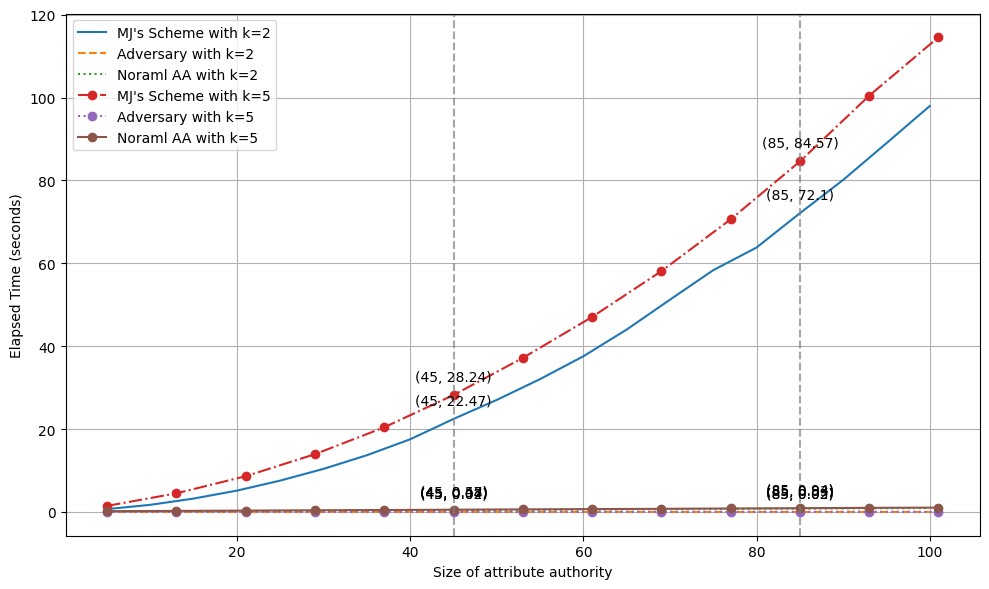

In [9]:
plot_linestyle(ks, xs, ys, sp_xs, sp_ys, ["MJ's Scheme", "Adversary", "Noraml AA"])

### Comparsion

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comp(ks, xss, ys, comp_ys, labels):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, k, y, y_,  style in zip(range(len(ks)), ks, ys, comp_ys, linestyles):
        plt.plot(xss[i], y, label=f'CP{i+1}: {labels[0]} with k={k}', linestyle=style)
        plt.plot(xss[i], y_, label=f'CP{i+1}: {labels[1]} with k={k}', linestyle=style, alpha=0.7)

        plt.fill_between(xss[i], y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xss[i]) // 2  # Finding the index at the middle of the dataset
        mid_x = xss[i][mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, mid_y), textcoords='data', ha='center', size= 25)

    plt.xlabel('Size of attribute authority')
    plt.ylabel('Time Cost (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [11]:
ks = [2,5,10]

xs = range(5,101,5)
comp_xs = range(5,102,8)
ys = []
comp_ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
#ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[0])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
#sp_ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

ys.append([d['total'] for d in datasets[str(ks[2])]['seq']])
#sp_ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[2])]['seq']])

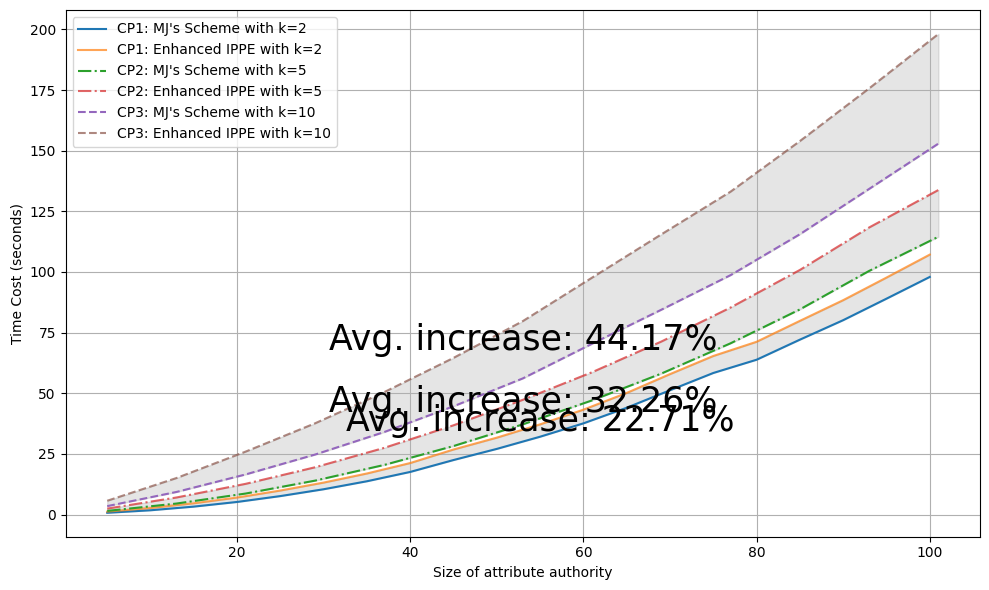

In [12]:
plot_comp(ks, [xs, comp_xs, comp_xs], ys, comp_ys, ["MJ's Scheme", 'Enhanced IPPE'])#, "Compare Cost for Original Scheme and our Enhanced IPPE")

In [13]:
ys = []
comp_ys = []
ks = [2,5,10]
ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[0])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[2])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[2])]['seq']])

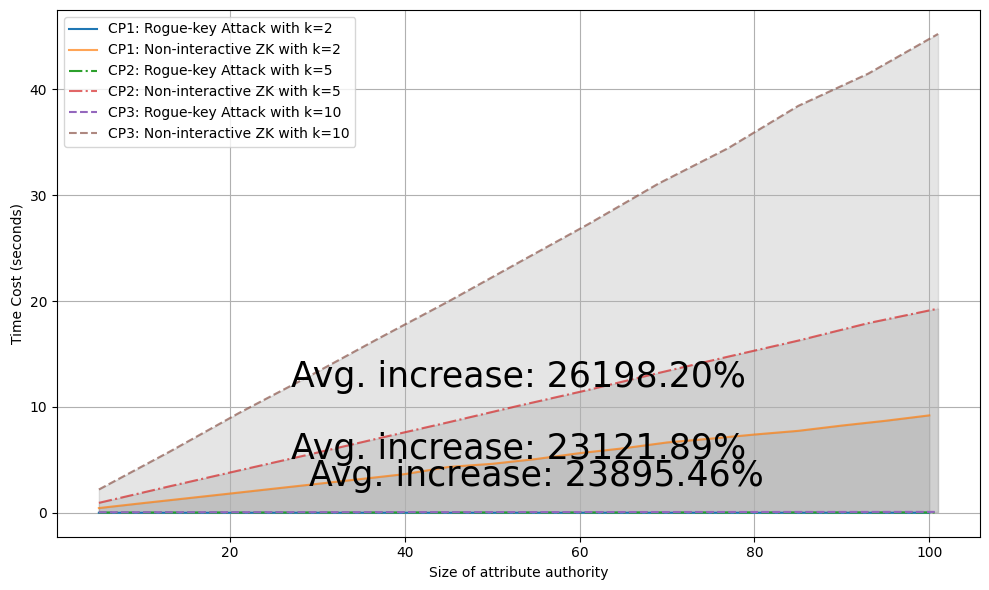

In [14]:
plot_comp(ks, [xs, comp_xs, comp_xs], ys, comp_ys, ['Rogue-key Attack','Non-interactive ZK'])#, "Compare Cost for Rogue-key Attack and its Defense")

In [7]:
print (list(range(1,5)))

[1, 2, 3, 4]
